This notebook analyses the output from a symmetric forcing, $\pm 8$ W m$^{-2}$ downwelling long wave flux, and $\pm 1.5$K SST.

When generating a new database, make sure to only load in the output directories. There's no point loading in the restarts! It will save a lot of compute time when computing the Dask arrays.

In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client()
display(client)

Client Scheduler: tcp://127.0.0.1:42937 Dashboard: /proxy/41623/status,Cluster Workers: 3 Cores: 6 Memory: 25.77 GB


In [3]:
### Generate new database

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt.db'

session = cc.database.create_session(db)

directory_list = ['/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont',
                     '/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_rcp45cool',
                     '/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_rcp45warm']

In [4]:
cc.querying.get_experiments(session)

,experiment,ncfiles
0,1deg_jra55_ryf_cont,42207
1,1deg_jra55_ryf_rcp45cool,47726
2,1deg_jra55_ryf_rcp45warm,47640


In [5]:
# Control

control_expt = '1deg_jra55_ryf_cont'
control = cc.querying.get_variables(session, experiment = control_expt)

temp_control = cc.querying.getvar(control_expt, 'temp', session, frequency = '1 monthly').chunk(chunks='auto')
 # [:-1] to remove 2200-01-01:
GAT_control = cc.querying.getvar(control_expt, 'temp_global_ave', session)[:-1].chunk(chunks=3650).load().groupby('time.year').mean('time')
SST_control = cc.querying.getvar(control_expt, 'temp_surface_ave', session)[:-1].chunk(chunks=3650).load().groupby('time.year').mean('time')

In [6]:
# Cool

cool_expt = '1deg_jra55_ryf_rcp45cool'
cool = cc.querying.get_variables(session, experiment = cool_expt)

temp_cool = cc.querying.getvar(cool_expt, 'temp', session, frequency = '1 monthly').chunk(chunks='auto')
GAT_cool = cc.querying.getvar(cool_expt, 'temp_global_ave', session)[:-1].chunk(chunks=3650).load().groupby('time.year').mean('time')
SST_cool = cc.querying.getvar(cool_expt, 'temp_surface_ave', session)[:-1].chunk(chunks=3650).load().groupby('time.year').mean('time')

GAT_cool_anom = GAT_cool - GAT_control
SST_cool_anom = SST_cool - SST_control

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


In [7]:
# Warm

warm_expt = '1deg_jra55_ryf_rcp45warm'
warm = cc.querying.get_variables(session, experiment = warm_expt)

temp_warm = cc.querying.getvar(warm_expt, 'temp', session, frequency = '1 monthly').chunk(chunks='auto')
GAT_warm = cc.querying.getvar(warm_expt, 'temp_global_ave', session)[:-1].chunk(chunks=3650).load().groupby('time.year').mean('time')
SST_warm = cc.querying.getvar(warm_expt, 'temp_surface_ave', session)[:-1].chunk(chunks=3650).load().groupby('time.year').mean('time')

GAT_warm_anom = GAT_warm - GAT_control
SST_warm_anom = SST_warm - SST_control

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [15]:
x = cc.querying.getvar(control_expt, 'temp_surface_ave', session)[:-1]#.chunk(chunks=3650)

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


<xarray.DataArray 'temp_surface_ave' (time: 36499, scalar_axis: 1)>
dask.array<getitem, shape=(36499, 1), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * scalar_axis  (scalar_axis) float64 0.0
  * time         (time) object 2100-01-02 00:00:00 ... 2199-12-31 00:00:00
Attributes:
    long_name:     Global mass weighted mean surface temp in liquid seawater
    units:         deg_C
    valid_range:   [ -10. 1000.]
    cell_methods:  time: point

In [19]:
x.groupby('time.year').mean('time')

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


<xarray.DataArray 'temp_surface_ave' (year: 100, scalar_axis: 1)>
dask.array<stack, shape=(100, 1), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * scalar_axis  (scalar_axis) float64 0.0
  * year         (year) int64 2100 2101 2102 2103 2104 ... 2196 2197 2198 2199

Text(0.5, 1.0, 'Global average temperature')

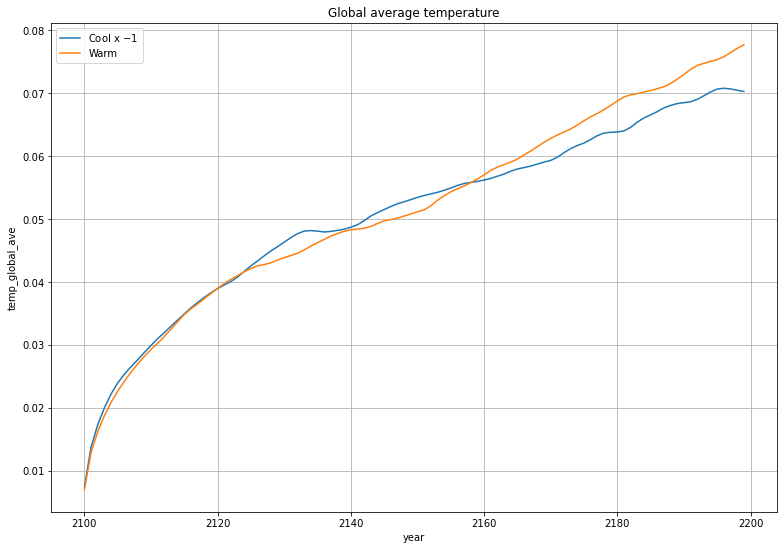

In [27]:
plt.figure(figsize = (13,9))

(-1*GAT_cool_anom).plot(label='Cool x $\minus$1')
(GAT_warm_anom).plot(label='Warm')
# GAT_cool.plot(label='Cool')
# GAT_warm.plot(label='Warm')
# GAT_control.plot(label='Control')

plt.grid()
plt.legend()
plt.title('Global average temperature')
#plt.savefig('GAT anomaly')

In [1]:
plt.figure(figsize = (13,9))

(-1*SST_cool_anom).plot(label='Cool')
SST_warm_anom.plot(label='Warm')
SST_cool.plot(label='Cool')
SST_warm.plot(label='Warm')

plt.grid()
plt.legend()
plt.title('SST anomaly')

NameError: name 'plt' is not defined

In [84]:
# Get linear trend of drift 

def line(t, A, B):
    return A*t + B

years = np.linspace(1, 100, 100)

# GAT

popt, pcov = curve_fit(line, years, GAT_control[:,0])

GAT_drift = line(years, popt[0], popt[1])

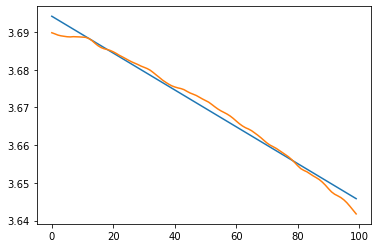

In [85]:
plt.plot(GAT_drift)
plt.plot(GAT_control[:,0].values)